# Analysis of Structured Animation Result

## Trial #1 : Chi-square Test and Binomial Test

### Example of SA6: Color vs Position

In this experiment, the participants was asked to select to compare **Color vs Position.** 
You can see an example here.  
[SA6 Color vs Position question](https://purdue.qualtrics.com/SE/?SID=SV_2skkXzdEToFkqWx)


From 50 participants, **14** people selected **Position-based grouping** and **32** selected **Color-based grouping**.  And **4** selected **other grouping**.  

From these data, we would like to test two hypothesis.  

* H1: There is natural grouping by property.
* H2: Color is more strong than the position. 

##### Test of H1: There is natural grouping by property

 * $P_{color}$: Probability of selecting color-based grouping
 
 * $P_{position}$: Probability of selecting position-based grouping
    
 * $P_{other}$: Probability of selecting other grouping
    
**Null Hypothesis $H_{0}$**: There is no natural grouping by property. 
   
$$P_{color} = P_{position} = P_{other} = \frac{1}{3}$$  
    

Since there are 3 categories, we can use chi-square test($\chi^2$) for goodness of fit.  


**Caution**: for chi-squared statics to hold, a sample with a sufficiently large size is assumed.  
it is known that the expected numbers of occurrences in each category i is more than 10.  In our case, it holds because expected numbers of occurences are $50 \times \frac{1}{3} = 16.67$. 

$$\chi^2=\sum_{i}\frac{(o_i - E_i)^2}{E_i}$$ 

where $E_i = Np_i$ is the expected number of cases in category i under the null hypothesis, and $o_i$ is the observed number of cases in category i. 


So by applying the numbers, 

$$\chi_2 = \frac{(14 - 16.67)^2}{16.67} + \frac{(32 - 16.67)^2}{16.67} + \frac{(4 - 16.67)^2}{16.67}$$

In [1]:
# Inputs are observation for events

o1 = 14
o2 = 32
o3 = 4


numSample = o1 + o2 + o3
p = 1/3.0

e = numSample * p

chi_numerator = (o1 - e)**2 + (o2 - e)**2 + (o3 - e)**2
chi = chi_numerator / e

Using the scipy library gives us the probability of null hypothesis being true is lower than 1%.  

In [2]:
import scipy.stats
scipy.stats.chisquare([14,32,4])

(24.16, 5.6718228590279619e-06)

So we can say that **H1: There is a natural grouping.** is true.

##### Test of H2: Color is more strong than than the position.

** Null Hypothesis: $H_0$**: $P_{color}$ = $P_{position}$

**Caution:** I am not sure that below approach is right.  I remove the 4 participants who gave other ratings.  And use only the color and position to run the binomial test.  

In [3]:
import scipy.stats
scipy.stats.binom.sf(32-1,46, 0.5) # One sided binomial test

0.0056757957183890583

This gives p-value of 0.0057, which means the null hypotesis is not supported with 1% confidence level.

So we can say the H2 is supported with 1% confidence level. 

### Application to the All experiment

Now we apply this method to the all dataset. 

First the below is all the dataset recorded. 


In [5]:
import scipy.stats


SA = {}
SA[1] = {'count':[1,1,0], 'label':['Velocity','Position', 'Other']}
SA[2] = {'count':[29, 20, 1], 'label':['Color','Velocity','Other']}
SA[3] = {'count':[22, 28, 0], 'label':['Shape','Velocity','Other']}
SA[4] = {'count':[20,29, 1], 'label':['Size','Velocity','Other']}
SA[5] = {'count':[21,21,8], 'label':['Position','Acc','Other']}
SA[6] = {'count':[14,32,4], 'label':['Position','Color','Other']}
SA[7] = {'count':[28,16,6], 'label':['Shape','Position','Other']}
SA[8] = {'count':[15,26,9], 'label':['Velocity','Acc','Other']}
SA[9] = {'count':[30,16,4], 'label':['Size','Position','Other']}
SA[10] = {'count':[1,1,0], 'label':['Shape','Color','Other']}
SA[11] = {'count':[20,23,7], 'label':['Shape','Size','Other']}
SA[12] = {'count':[1,1,0], 'label':['Size','Acc','Other']}
SA[13] = {'count':[31,15,4], 'label':['Color','Size','Other']}
SA[14] = {'count':[28,19,3], 'label':['Color','Acc','Other']}
SA[15] = {'count':[24,20,6], 'label':['Shape','Acc','Other']}

for index,data in SA.iteritems():
    print str(index) + ' :     ' +  data['label'][0] + ' vs ' + data['label'][1]
    
#     Test of H1 using chi square test
    [chi, pValue] = scipy.stats.chisquare(data['count'])
    print 'Chi value is ' + str(chi)
    if (pValue < 0.005):
        print '\t\t H1 is true with Confidence level 1%.' 
    else:
        print '\t\t H1 is false.'
        
#    Test of H2 using binomial test
    if data['count'][0] > data['count'][1]:
        largeCount = data['count'][0]
        largeLabel = data['label'][0]
        smallCount = data['count'][1]
        smallLabel = data['label'][1]
        
    else:
        largeCount = data['count'][1]
        largeLabel = data['label'][1]
        smallCount = data['count'][0]
        smallLabel = data['label'][0]
        
    pValue = scipy.stats.binom.sf(largeCount-1,smallCount+largeCount, 0.5) # One sided binomial test
    if (pValue < 0.05):
        print '\t\t H2 is true\t' + largeLabel + ' > ' + smallLabel
    else:
        print '\t\t H2 is false\t' + largeLabel + ' = ' + smallLabel
    

1 :     Velocity vs Position
Chi value is 1.0
		 H1 is false.
		 H2 is false	Position = Velocity
2 :     Color vs Velocity
Chi value is 24.52
		 H1 is true with Confidence level 1%.
		 H2 is false	Color = Velocity
3 :     Shape vs Velocity
Chi value is 26.08
		 H1 is true with Confidence level 1%.
		 H2 is false	Velocity = Shape
4 :     Size vs Velocity
Chi value is 24.52
		 H1 is true with Confidence level 1%.
		 H2 is false	Velocity = Size
5 :     Position vs Acc
Chi value is 6.76
		 H1 is false.
		 H2 is false	Acc = Position
6 :     Position vs Color
Chi value is 24.16
		 H1 is true with Confidence level 1%.
		 H2 is true	Color > Position
7 :     Shape vs Position
Chi value is 14.56
		 H1 is true with Confidence level 1%.
		 H2 is true	Shape > Position
8 :     Velocity vs Acc
Chi value is 8.92
		 H1 is false.
		 H2 is false	Acc = Velocity
9 :     Size vs Position
Chi value is 20.32
		 H1 is true with Confidence level 1%.
		 H2 is true	Size > Position
10 :     Shape vs Color
Chi valu

Color > Size = Shape > Position > Velocity 

With Acc, there is no supporting arguments.  It suggests that Acc is not tested meaningfully. 

## Trial #2 : Thurstone-Mosteller Least Squares Method

In [12]:

import scipy.stats
import numpy as np

SA = {}
SA[1] = {'count':[1,1,0], 'label':['Velocity','Position', 'Other']}
SA[2] = {'count':[29, 20, 1], 'label':['Color','Velocity','Other']}
SA[3] = {'count':[22, 28, 0], 'label':['Shape','Velocity','Other']}
SA[4] = {'count':[20,29, 1], 'label':['Size','Velocity','Other']}
SA[5] = {'count':[21,21,8], 'label':['Position','Acc','Other']}
SA[6] = {'count':[14,32,4], 'label':['Position','Color','Other']}
SA[7] = {'count':[28,16,6], 'label':['Shape','Position','Other']}
SA[8] = {'count':[15,26,9], 'label':['Velocity','Acc','Other']}
SA[9] = {'count':[30,16,4], 'label':['Size','Position','Other']}
SA[10] = {'count':[1,1,0], 'label':['Shape','Color','Other']}
SA[11] = {'count':[20,23,7], 'label':['Shape','Size','Other']}
SA[12] = {'count':[1,1,0], 'label':['Size','Acc','Other']}
SA[13] = {'count':[31,15,4], 'label':['Color','Size','Other']}
SA[14] = {'count':[28,19,3], 'label':['Color','Acc','Other']}
SA[15] = {'count':[24,20,6], 'label':['Shape','Acc','Other']}

labelOrder = {'Velocity':0,'Position':1,'Color':2,'Shape':3,'Size':4,'Acc':5}
labels = ['Velocity','Position','Color','Shape','Size','Acc']

# Counts is a n-by-n matrix where
#  Counts[i,j] = # people who prefer option i over option j
# N is total number of experiment for each comparision 

Counts = np.zeros([6,6])

for index,data in SA.iteritems():
#     print str(index) + ' :     ' +  data['label'][0] + ' vs ' + data['label'][1]
    Counts[labelOrder[data['label'][0]],labelOrder[data['label'][1]]] = data['count'][0]
    Counts[labelOrder[data['label'][1]],labelOrder[data['label'][0]]] = data['count'][1]
    




In [13]:
Counts

array([[  0.,   1.,  20.,  28.,  29.,  15.],
       [  1.,   0.,  14.,  16.,  16.,  21.],
       [ 29.,  32.,   0.,   1.,  31.,  28.],
       [ 22.,  28.,   1.,   0.,  20.,  24.],
       [ 20.,  30.,  15.,  23.,   0.,   1.],
       [ 26.,  21.,  19.,  20.,   1.,   0.]])

In [ ]:
N = Counts + Counts.T

P = Counts / (N + (N==0))

P[np.eye(6)>0] = 0.5

Z = scipy.stats.norm.ppf(P)

S = (-1) * np.mean(Z, axis=0)




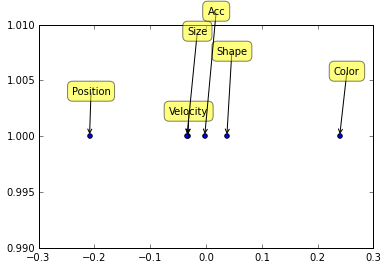

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

y = np.ones(6)

plt.scatter(S, y)
for index, x in enumerate(S):
    plt.annotate( labels[index],
                 xy=(x, 1), xytext = (20,20+20*index),textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

In [8]:
S

array([ inf,  inf,  inf,  inf,  inf,  inf])